In [70]:
import pandas as pd
import datetime 
import warnings 
warnings.filterwarnings(action  = 'ignore')
crime = pd.read_csv('crime.csv')
crime['REPORTED_DATE']=pd.to_datetime(crime['REPORTED_DATE'])
crime_dt =crime.set_index('REPORTED_DATE')
crime_dt14=crime_dt.loc['2014'].sort_index()

In [71]:
crime_dt14= crime_dt14[[ 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'GEO_LON',
       'GEO_LAT', 'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC']]

In [9]:
crime_dt14

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-01-01 00:08:00,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...
2014-12-31 23:59:00,weapon-carrying-concealed,all-other-crimes,-105.017647,39.718170,valverde,1,0
2014-12-31 23:59:00,traffic-accident,traffic-accident,-105.040484,39.751199,sloan-lake,0,1
2014-12-31 23:59:00,assault-dv,other-crimes-against-persons,-105.017647,39.718170,valverde,1,0


In [72]:
type_index = crime_dt14['OFFENSE_TYPE_ID'].value_counts().head(20)
type_index

traffic-accident                15415
traf-other                       5851
traffic-accident-hit-and-run     5501
theft-items-from-vehicle         3781
theft-other                      3421
theft-of-motor-vehicle           3411
theft-shoplift                   3051
criminal-mischief-mtr-veh        2665
criminal-trespassing             2383
criminal-mischief-other          2339
assault-simple                   2299
liquor-possession                2203
disturbing-the-peace             1994
public-order-crimes-other        1735
burglary-residence-no-force      1650
burglary-residence-by-force      1616
assault-dv                       1546
theft-bicycle                    1404
theft-parts-from-vehicle         1300
threats-to-injure                 979
Name: OFFENSE_TYPE_ID, dtype: int64

traffic-accident
traf-other
traffic-accident-hit-and-run
theft-items-from-vehicle
theft-other
theft-of-motor-vehicle
theft-shoplift
criminal-mischief-mtr-veh
criminal-trespassing
criminal-mischief-other


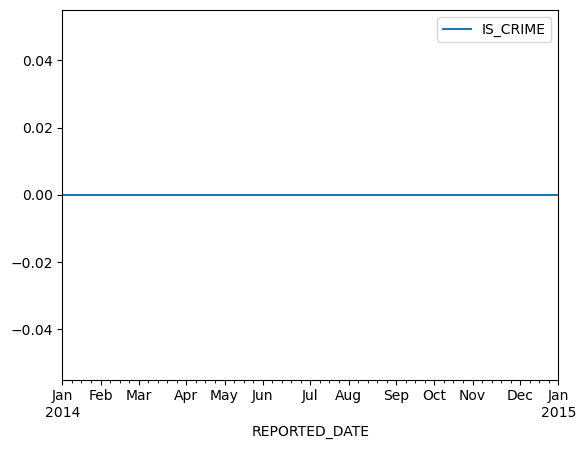

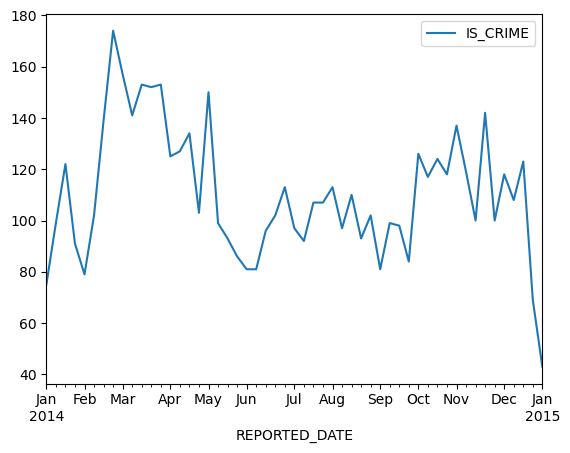

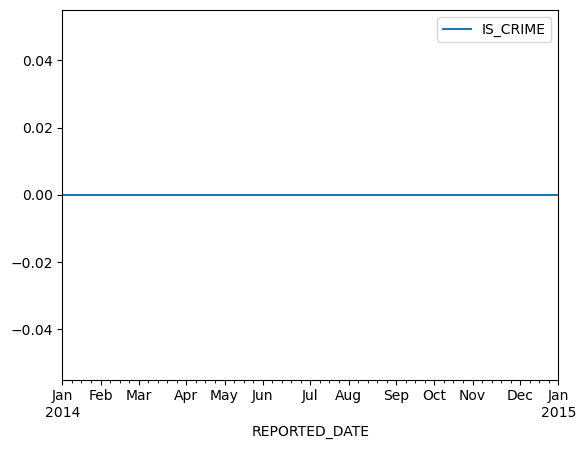

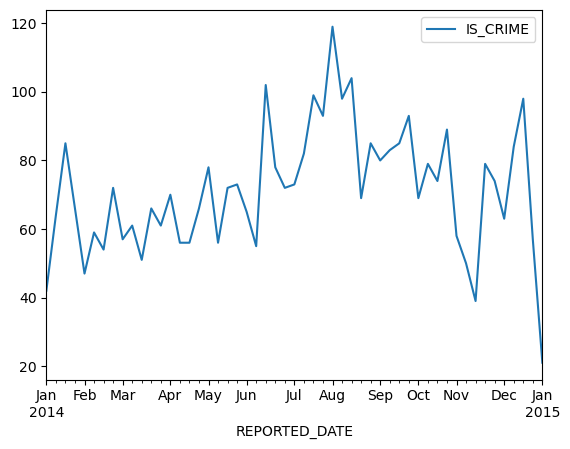

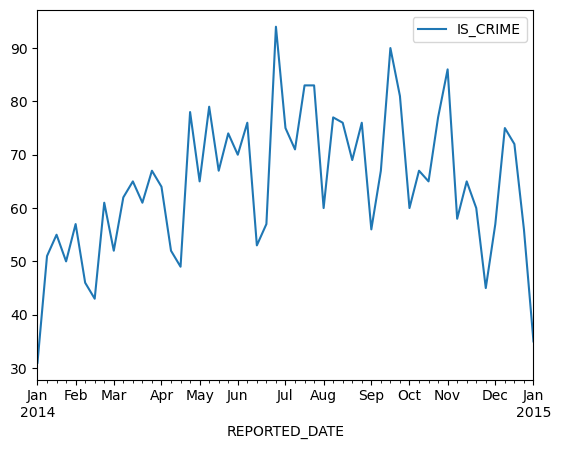

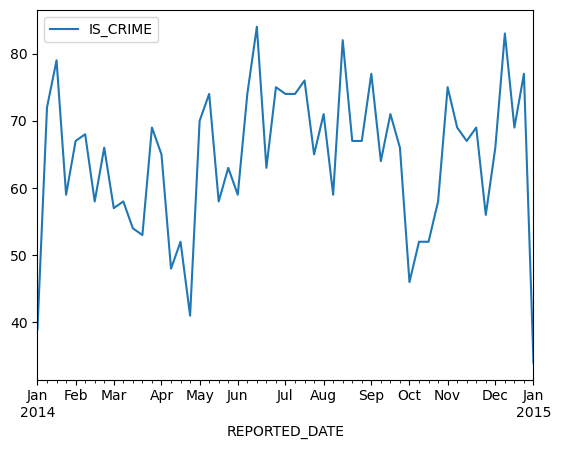

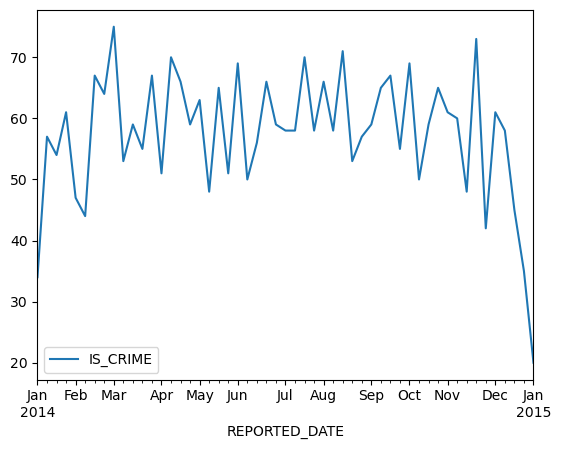

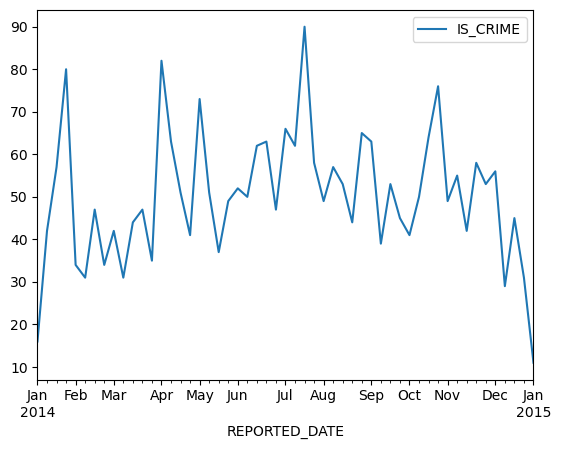

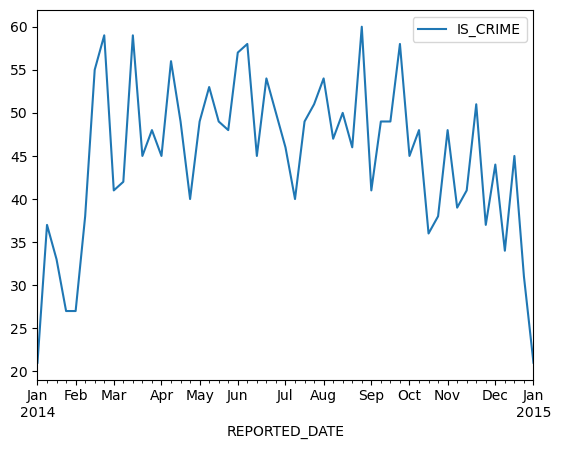

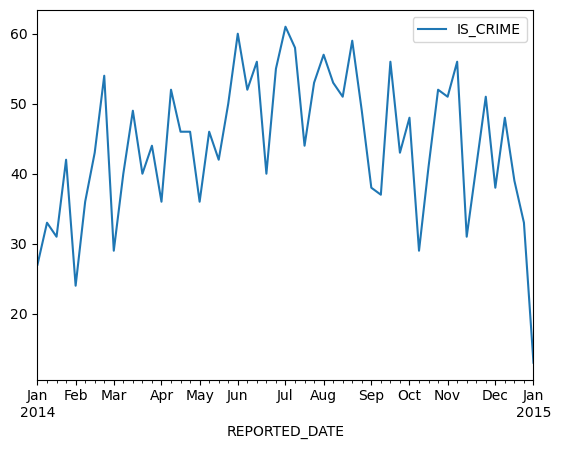

In [74]:
# OFFENSE_TYPE_ID 개수 상위 10개에 대하여 범죄발생 여부 시계열 그래프 그리기
new_df =crime_dt14[['IS_CRIME' , 'OFFENSE_TYPE_ID']]
for idx in type_index.index [:10]:
    print(idx)
    neww_df = new_df[new_df['OFFENSE_TYPE_ID']==idx]
    df = neww_df.resample('W').sum()
    df.plot()